In [61]:
import numpy as np
import pandas as pd                                                                                                                                                                                                                                                                                                                                        
import cv2
import matplotlib.pyplot as plt
import warnings                                                                                                                                                                                                         
warnings.filterwarnings("ignore")                                                                                                               
import spectral.io.envi as envi
import spectral as spy                                                                                                                                                                                                                                                                                                                                                                                                      
from spectral import open_image
import os                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
from math import floor
import tensorflow

In [62]:
from tensorflow import keras

In [63]:
test_ds = keras.utils.image_dataset_from_directory(
    directory='Keras_ds_processed/test/',
    labels='inferred',
    batch_size = 735,
    label_mode='categorical',
    image_size=(100, 100))

val_ds = keras.utils.image_dataset_from_directory(
    directory='Keras_ds_processed/val/',
    labels='inferred',
    label_mode='categorical',
    batch_size = 32,
    image_size=(100, 100))

train_ds = keras.utils.image_dataset_from_directory(
    directory='Keras_ds_processed/train/',
    labels='inferred',
    label_mode='categorical',
    batch_size = 32,
    image_size=(100, 100))

Found 735 files belonging to 10 classes.
Found 721 files belonging to 10 classes.
Found 3387 files belonging to 10 classes.


In [64]:
from keras import layers

In [65]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import numpy as np

np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(100,100,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 25, 25, 96)        34944     
                                                                 
 batch_normalization_18 (Bat  (None, 25, 25, 96)       384       
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 25, 25, 96)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 256)       614656    
                                                                 
 batch_normalization_19 (Bat  (None, 13, 13, 256)     

In [66]:
AlexNet.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
              loss=keras.losses.CategoricalCrossentropy(), 
              metrics=[keras.metrics.AUC()])
history = AlexNet.fit(train_ds, epochs=100, validation_data=test_ds)


Epoch 1/100


2023-04-18 20:09:16.732053: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [3387]
	 [[{{node Placeholder/_0}}]]
2023-04-18 20:09:16.732302: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3387]
	 [[{{node Placeholder/_4}}]]
2023-04-18 20:09:17.599586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


106/106 [==============================] - ETA: 0s - loss: 1.8644 - auc_1: 0.7936

2023-04-18 20:09:33.011179: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [735]
	 [[{{node Placeholder/_4}}]]
2023-04-18 20:09:33.011433: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [735]
	 [[{{node Placeholder/_0}}]]
2023-04-18 20:09:33.115029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


106/106 [==============================] - 17s 127ms/step - loss: 1.8644 - auc_1: 0.7936 - val_loss: 16.1106 - val_auc_1: 0.5279
Epoch 2/100
106/106 [==============================] - 11s 106ms/step - loss: 1.4352 - auc_1: 0.8995 - val_loss: 6.7412 - val_auc_1: 0.5669
Epoch 3/100
106/106 [==============================] - 11s 107ms/step - loss: 1.3083 - auc_1: 0.9185 - val_loss: 3.9594 - val_auc_1: 0.5120
Epoch 4/100
106/106 [==============================] - 12s 113ms/step - loss: 1.1850 - auc_1: 0.9357 - val_loss: 2.4994 - val_auc_1: 0.7373
Epoch 5/100
106/106 [==============================] - 12s 113ms/step - loss: 1.1001 - auc_1: 0.9439 - val_loss: 2.0997 - val_auc_1: 0.7994
Epoch 6/100
106/106 [==============================] - 12s 111ms/step - loss: 1.0220 - auc_1: 0.9515 - val_loss: 1.0249 - val_auc_1: 0.9456
Epoch 7/100
106/106 [==============================] - 11s 105ms/step - loss: 1.0046 - auc_1: 0.9518 - val_loss: 1.3268 - val_auc_1: 0.9072
Epoch 8/100
106/106 [==========

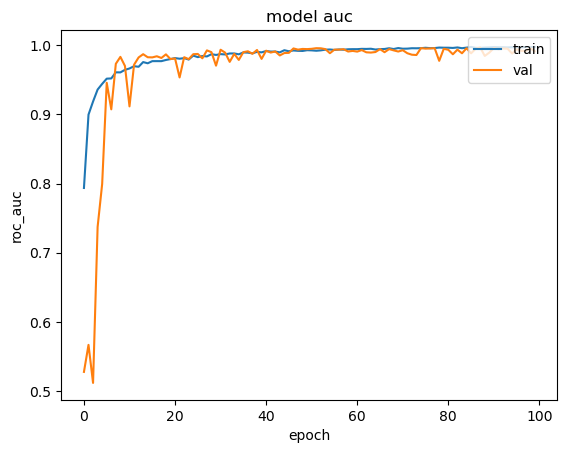

In [69]:
plt.plot(history.history['auc_1'])
plt.plot(history.history['val_auc_1'])
plt.title('model auc')
plt.ylabel('roc_auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [98]:
from sklearn.metrics import classification_report

for image_batch, labels_batch in test_ds:
  X_test = image_batch.numpy()
  y_test = labels_batch.numpy()
  break

print(y_test.shape)
pred = np.round(AlexNet.predict(X_test))
print(pred.shape)

roc_auc_ = "ROC-AUC: "+str(getv(roc_auc(y_test, pred)))
recall = "Recall: "+str(getv(recall_m(y_test, pred)))
precision = "Precision: "+str(getv(precision_m(y_test, pred)))

print(roc_auc_)
print(recall, precision)
mask = pd.DataFrame(y_test)==pd.DataFrame(pred)
mask[mask.sum(axis=1)!=10].iloc[:32]#==mask[mask.sum(axis=1)!=10].iloc[-32:]

(735, 10)
23/23 [==============================] - 0s 13ms/step
(735, 10)
ROC-AUC: 0.73705614
Recall: 0.8544218 Precision: 0.86263734


,0,1,2,3,4,5,6,7,8,9
4,True,True,True,True,False,False,True,True,True,True
6,True,True,True,True,True,True,False,False,True,True
20,True,True,True,True,False,False,True,True,True,True
22,False,False,True,True,True,True,True,True,True,True
25,True,True,False,False,True,True,True,True,True,True
26,True,True,False,False,True,True,True,True,True,True
33,True,True,True,True,False,False,True,True,True,True
36,True,True,True,True,True,False,False,True,True,True
40,False,False,True,True,True,True,True,True,True,True
44,True,True,True,False,False,True,True,True,True,True


In [71]:
from keras import backend as K
from datetime import date, datetime
from tensorflow import get_static_value as getv


def roc_auc(y_true, y_pred):    
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        
        recall = TP / (Positives+K.epsilon())    
        return recall 
    
    
    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
        precision = TP / (Pred_Positives+K.epsilon())
        return precision 
    
    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)
    
    return precision*recall

def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        
        recall = TP / (Positives+K.epsilon())    
        return recall

def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
        precision = TP / (Pred_Positives+K.epsilon())
        return precision 

'''today = date.today()
time = datetime.now()
time = time.strftime("%H:%M:%S")
filename = f"tested_architectures/{today}_{time}.txt"
f = open(filename, "w")

print(type(roc_auc))
roc_auc_ = "ROC-AUC: "+str(getv(roc_auc(label_batch, pred)))
recall = "Recall: "+str(getv(recall_m(label_batch, pred)))
precision = "Precision: "+str(getv(precision_m(label_batch, pred)))

print(roc_auc_)
print(recall)
print(precision)

f.write(roc_auc_)
f.write(recall)
f.write(precision)

with open(filename, 'w') as f:

    AlexNet.summary(print_fn=lambda x: f.write(x + '\n'))

f.close()'''


'today = date.today()\ntime = datetime.now()\ntime = time.strftime("%H:%M:%S")\nfilename = f"tested_architectures/{today}_{time}.txt"\nf = open(filename, "w")\n\nprint(type(roc_auc))\nroc_auc_ = "ROC-AUC: "+str(getv(roc_auc(label_batch, pred)))\nrecall = "Recall: "+str(getv(recall_m(label_batch, pred)))\nprecision = "Precision: "+str(getv(precision_m(label_batch, pred)))\n\nprint(roc_auc_)\nprint(recall)\nprint(precision)\n\nf.write(roc_auc_)\nf.write(recall)\nf.write(precision)\n\nwith open(filename, \'w\') as f:\n\n    AlexNet.summary(print_fn=lambda x: f.write(x + \'\n\'))\n\nf.close()'

In [ ]:
pd.DataFrame(np.round(pred))

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
730,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
732,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
733,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.DataFrame(label_batch)

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
730,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
733,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
pd.DataFrame(np.round(pred))==pd.DataFrame(y_test)

,0,1,2,3,4,5,6,7,8,9
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,False,False,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
730,True,True,True,True,True,True,True,True,True,True
731,True,True,True,True,True,True,True,True,True,True
732,True,True,True,True,True,True,True,True,True,True
733,True,True,True,True,True,True,True,True,True,True


23/23 [==============================] - 0s 15ms/step


Text(0.12, 0.1, '1st number - predicted; 2nd number - real')

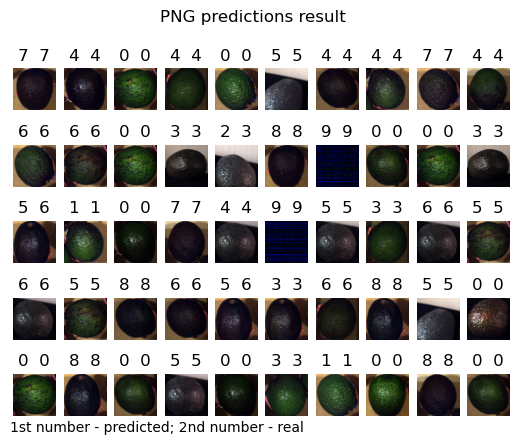

In [144]:
from random import randrange
N_ROWS = 5
ROW_IMG = 10
pred = AlexNet.predict(X_test)
fig = plt.figure()
for i in range(1, ROW_IMG * N_ROWS + 1):
    index = randrange(0, 735)
    plt.subplot(N_ROWS, ROW_IMG, i)
    plt.axis('off')
    image = (X_test[index] * -255).astype(np.uint8)
    plt.imshow(image)
    pred_ = np.argmax(pred[index])
    Target = str(pred_)+"  "+str(np.argmax(y_test[index]))
    plt.title(Target)
fig.suptitle('PNG predictions result');
fig.text(x = 0.12, y=0.1, s="1st number - predicted; 2nd number - real")